In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import noise
import model_opt
import algo_GD

In [2]:
noise_data = noise.Gauss(10000)
c = noise_data.generate()

(array([  1.,   0.,   0.,   1.,   0.,   1.,   6.,   1.,   3.,   1.,   3.,
         13.,  11.,   9.,   7.,   7.,  20.,  18.,  28.,  33.,  38.,  39.,
         37.,  51.,  48.,  64.,  70.,  76.,  81., 114., 124., 129., 150.,
        159., 158., 159., 203., 211., 217., 232., 261., 234., 257., 286.,
        270., 303., 291., 309., 293., 314., 300., 309., 301., 265., 263.,
        289., 267., 244., 196., 206., 213., 187., 162., 194., 137., 147.,
        136., 107., 121.,  86.,  71.,  68.,  59.,  61.,  39.,  47.,  34.,
         23.,  22.,  16.,  11.,  21.,  16.,  11.,   8.,  10.,   1.,   0.,
          2.,   2.,   1.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.65764672, -3.58250154, -3.50735635, -3.43221116, -3.35706597,
        -3.28192078, -3.20677559, -3.1316304 , -3.05648521, -2.98134003,
        -2.90619484, -2.83104965, -2.75590446, -2.68075927, -2.60561408,
        -2.53046889, -2.4553237 , -2.38017852, -2.30503333, -2.22988814,
        -2.15474295, -2.07

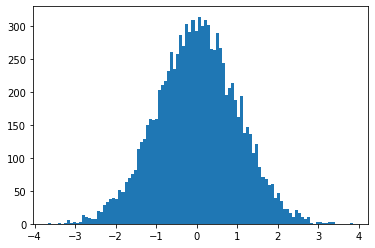

In [3]:
plt.hist(c,bins=100)

In [15]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []

for i in range(10):
    var = np.random.randint(1,200,1)[0]
    noise_data = noise.Gauss(2)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        noise_value = noise_data.generate(sigma=var)
        f = model_opt.RosenBrock(noise_value=noise_value)
        algo.update(model=f)
    last_w_store.append(algo.w)

In [16]:
last_w_store

[array([0.96375851, 1.00159063]),
 array([-0.26391854,  0.05191181]),
 array([0.95017437, 1.09995893]),
 array([0.36293189, 0.14412752]),
 array([-1.183581  ,  1.41680303]),
 array([1.22778762, 1.73340136]),
 array([0.86313219, 0.77523158]),
 array([0.37493198, 0.12957386]),
 array([-1.49330536,  2.12953145]),
 array([-0.62436522,  0.75479702])]

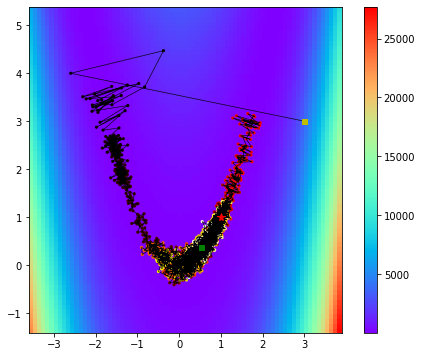

In [11]:
w_store = np.array(algo.wstore)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=1,linewidth = 0.5)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)
axes.plot(w_store.T[0],w_store.T[1],c="k",alpha=0.2,linewidth=1)
# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ys', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()